In [1]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import IncrementalPCA

In [2]:
df=pd.read_csv("Orinoquia_Carma_Traps/metadata/balanced_metadata.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39588 entries, 0 to 39587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      39588 non-null  int64 
 1   id              39588 non-null  object
 2   datetime        39588 non-null  object
 3   file_name       39588 non-null  object
 4   seq_id          39588 non-null  object
 5   frame_num       39588 non-null  int64 
 6   seq_num_frames  39588 non-null  int64 
 7   location        39588 non-null  object
 8   category_id     39588 non-null  int64 
 9   has_animal      39588 non-null  int64 
 10  species         39588 non-null  object
dtypes: int64(5), object(6)
memory usage: 3.3+ MB


In [3]:
img_size=(150,150)


In [4]:
# a = np.array([1, 2, 3, 4])
# np.savetxt('test1.txt', a, fmt='%d')
# b = np.loadtxt('test1.txt', dtype=int)
# a == b

In [5]:
image_data = []
labels = []
# Replace with your own dataframe or image/label loading logic
for i in range(len(df)):
    if(i%1000==0):
        print(i)
    img_path = f"Orinoquia_Carma_Traps/orinoquia_camera_traps_images/public/{df.file_name[i]}"
    img = Image.open(img_path).convert("L")  # Convert to grayscale for simplicity
    img_resized = img.resize((150, 150))       # Resize for consistency
    img_array = np.array(img_resized).flatten()  # Flatten to 1D vector
    image_data.append(img_array)
    labels.append(df.has_animal[i])

X = np.array(image_data)
y = np.array(labels)

In [6]:
#np.savetxt('X.txt', X, fmt='%d')
X=np.loadtxt('X.txt', dtype=int)
y=np.loadtxt('y.txt', dtype=int)

In [7]:
n=int(len(X)/100)
print(n)

395


In [8]:
np.shape(X)

(39588, 22500)

In [9]:


#ipca.fit(X)

In [11]:
j=0
batch_size=500
print(X.shape[0]/batch_size)
ipca=IncrementalPCA(n_components=100, batch_size=batch_size)
for i in range(0, X.shape[0], batch_size):  # batch size = 50
    if(j%10==0):
        print(j)
    batch = X[i:i+batch_size, :]  # preserve (50, 22500) shape
    ipca.partial_fit(batch)
    j=j+1

79.176
0
10
20
30
40
50
60
70


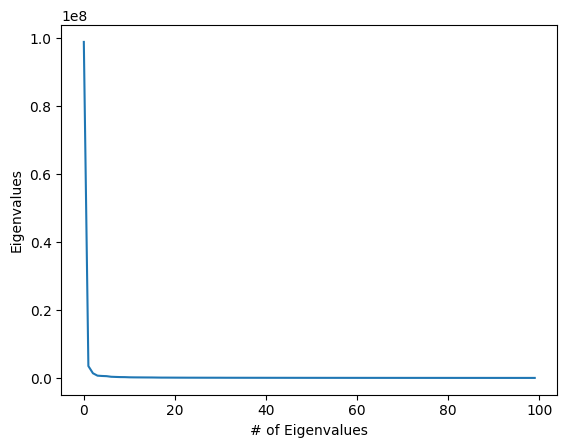

In [12]:
plt.ylabel("Eigenvalues")
plt.xlabel("# of Eigenvalues")
plt.plot(ipca.explained_variance_)

In [13]:
#it looks like 20 is a good amount of Principle components
j=0
batch_size=500
print(X.shape[0]/batch_size)
ipca=IncrementalPCA(n_components=20, batch_size=batch_size)
for i in range(0, X.shape[0], batch_size):  # batch size = 50
    if(j%10==0):
        print(j)
    batch = X[i:i+batch_size, :]  # preserve (50, 22500) shape
    ipca.partial_fit(batch)
    j=j+1

79.176
0
10
20
30
40
50
60
70


In [15]:
np.shape(ipca.components_)

(20, 22500)

In [22]:
X_ipca=ipca.transform(X)

In [23]:
print(np.shape(X_ipca))
print(np.shape(y))

(39588, 20)
(39588,)
